# Two photon emission rate of  hydrogen atom in the free space

This program calculates the two photon emission rates for hydrogen atom. The details of the physics is given in ref. [1]. This code uses lots of the libraries developed by https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/detailed_doc.html [2]. The TPE rates are then compared with the literature [3]

[1]. Generating heralded high-dimensional hyper-entangled photons using Rydberg atoms,...

[2]. N. Sibalic, J.D. Pritchard, C.S. Adams, and K.J.Weatherill, Arc: An open-source library for calculating properties of alkali rydberg atoms, Computer Physics Communications 220, 319-331 (2017).

[3]. J. Chluba and R. A. Sunyaev, “Two-photon transitions in hydrogen and cosmological recombination,” Astronomy and Astrophysics 480, 629–645 (2008).

[4]. L. D. Landau and E. M. Lifshitz, Quantum Mechanics - Non relativistic theory, Ed. 3 (Pergamon, London,1977).

The TPE rate for hydrogen atom in the free space is given as:
\begin{align}
\Gamma   &= \frac{3^2 Z^{10}}{2^{11}} R_H \alpha^6 c \Big( \frac{k_{fi}}{k_0}\Big)^5 \int_{y=0}^{1} y^3 (1-y)^3 dy  \Big| \sum_m d_{fm}d_{mi} \Big( \frac{1}{y - y_{im}} + \frac{1}{1 - y - y_{im}} \Big) \Big|^2
\end{align}

Please check the Appendix B of ref. [1] for better understanding of the formula above.


In [1]:
#This program is to connect with the library

# Configure the matplotlib graphics library and configure it to show 
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
import sys,os
rootDir = '/home/sutapa/ARC-Alkali-Rydberg-Calculator-2.0.5/' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
sys.path.insert(0,rootDir)

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

The dipole moment contains the contribution from both the bound states and the continuum states. Now we are calculating the continuous states of H-atom. This wavefunction is for E>0 and energy eigenvalues are highly degenerate. The analytical expression for the continuum state for hydrogenic atom is written as:

\begin{align*}
R^{cont}_{pl} &= \frac{C_{pl}}{(2l+1)!} (2pr)^l e^{-ipr} F(iZ/p+l+1,2l+2,2ipr)\\
C_{pl} &= 2p e^{\pi Z/2p} |\Gamma(l+1+iZ/p)|
\end{align*}

where F represents a first order hypergeometric function and $p=\sqrt{2E}$ represents the continuous momentum states in atomic units. For TPE rate, we calculate the overlap wavefunction of the initial and final bound state with the continuum state for p-state, $l=1$.

In this code we calculate the continuous state for radius, r and save it so that we do not have to calculate them again. Later these states are called in the other part of the program.

In [ ]:
from mpmath import *
mp.dps = 5; mp.pretty = True
from scipy.special import factorial, gamma, assoc_laguerre
from scipy import integrate
import array as arr

l=1
b=2*l+2
coef_1=1/factorial(2*l+1)
k=np.arange(0.01,2,0.01)
r=np.arange(0,105000,1)
R_kl=np.zeros((len(k),len(r)), dtype=np.float64 )  
A_kl=arr.array('f',k)
for j in range(0,len(k)):
    a=(1j/k[j])+l+1
    coef=2*k[j]*np.exp(np.pi/(2*k[j]))*abs(gamma(l+1-1j/k[j]))
    for i in range(0,len(r)):
        R_kl[j][i]= np.real(coef*coef_1*np.exp(-1j*k[j]*r[i])*((2*k[j]*r[i])**l)*hyp1f1(a,b,2*1j*k[j]*r[i]))

#np.savetxt('R_kl_105000_1.dat', R_kl)  

The variable A_kl1 is an overlap integral between the final transition state and all the continuous states of the hydrogen atom. Make sure that the radius, r is defined same as for the calculation of the continuous states. Because we will be calculating the integral with the $R_{kl}$

In [ ]:
#Calculation of matrix element
from mpmath import *
mp.dps = 5; mp.pretty = True
from scipy.special import factorial, gamma, assoc_laguerre
from scipy import integrate
import array as arr

atom=Hydrogen()
n1=1
l1=0
j1=0.5
l=1

step=0.01
a1,b1 = atom.radialWavefunction(l1,0.5,j1,atom.getEnergy(n1, l1, j1)/27.211,atom.alphaC**(1/3.0),200, step)
b1=(-1)**(n1-1)*(-1)**l1*b1
#plt.plot(a1,b1)

b=2*l+2
coef_1=1/factorial(2*l+1)
k=np.arange(0.01,2,0.01)
r=a1
R_kl=np.zeros((len(k),len(r)), dtype=np.float64 )  
A_kl1=arr.array('f',k)
for j in range(0,len(k)):
    a=(1j/k[j])+l+1
    coef=2*k[j]*np.exp(np.pi/(2*k[j]))*abs(gamma(l+1-1j/k[j]))
    sum_c=0.0
    for i in range(1,len(r)):
        R_kl[j][i]= np.real(coef*coef_1*np.exp(-1j*k[j]*r[i])*((2*k[j]*r[i])**l)*hyp1f1(a,b,2*1j*k[j]*r[i]))
        sum_c+= R_kl[j][i]*b1[i]*(r[i]**2)*abs(r[i-1]-r[i])
    A_kl1[j]=sum_c/((2*np.pi)**0.5)

print(A_kl1)    
#np.savetxt('A_kl1_6S_200_0.01.dat', A_kl1)

This will calculate the overlap of the wavefuction, A_kl2 of continuous state with the initial state ($n_i$ $l_i$) of the two photon transition. This part of the code need to be change everytime depending on the initial state. Again, here make sure that the radius, r is defined same as for the calculation of the continuous states. Because we will be calculating the integral with the $R_{kl}$

In [ ]:
#Calculation of matrix element
from mpmath import *
mp.dps = 5; mp.pretty = True
from scipy.special import factorial, gamma, assoc_laguerre
from scipy import integrate
import array as arr

atom=Hydrogen()
n2=60
l2=0
j2=0.5
l=1

step=0.01
a1,b1 = atom.radialWavefunction(l2,0.5,j2,atom.getEnergy(n2, l2, j2)/27.211,atom.alphaC**(1/3.0),15000, step)
b1=(-1)**(n2-1)*(-1)**l2*b1
#plt.plot(a1,b1)


b=2*l+2
coef_1=1/factorial(2*l+1)
k=np.arange(0.01,2,0.01)
r=a1
R_kl=np.zeros((len(k),len(r)), dtype=np.float64 )  
A_kl2=arr.array('f',k)
for j in range(0,len(k)):
    a=(1j/k[j])+l+1
    coef=2*k[j]*np.exp(np.pi/(2*k[j]))*abs(gamma(l+1-1j/k[j]))
    sum_c=0.0
    for i in range(1,len(r)):
        R_kl[j][i]= np.real(coef*coef_1*np.exp(-1j*k[j]*r[i])*((2*k[j]*r[i])**l)*hyp1f1(a,b,2*1j*k[j]*r[i]))
        sum_c+= R_kl[j][i]*b1[i]*(r[i]**2)*abs(r[i]-r[i-1])
    A_kl2[j]=sum_c/((2*np.pi)**0.5)

print(A_kl2)    
#np.savetxt('A_kl2_60s_15000_0.01.dat', A_kl2) 

This code calls the saved variables A_kl1 and A_kl2.  

In [2]:
#R_kl= np.loadtxt('R_kl_100000_1.dat')
A_kl1= np.loadtxt('A_kl1_6S_200_0.01.dat')
A_kl2= np.loadtxt('A_kl2_60s_15000_0.01.dat')

Finally we will calculate the two photon rates below for the H-atom for a transition from $n_i l_i \rightarrow 1S$ state and will compare with the literature for various values of the initial state $n_i l_i$

60.67406375538101


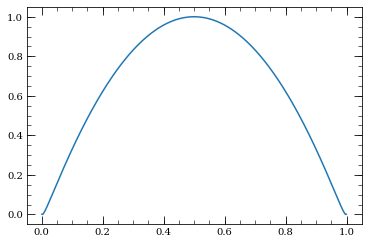

In [4]:
from scipy.special import assoc_laguerre, factorial,gamma
from scipy import integrate
import array as arr

def R(r,n,l):
    Z=1
    R1= ((2*Z/n)**3 * factorial(n-l-1)/(2*n*factorial(n+l)))**0.5 * np.exp(-Z*r/n)*(2*Z*r/n)**l*assoc_laguerre(2*Z*r/n,n-l-1,2*l+1)
    return(R1)

def kappa(n1,l1,n2,l2,m,lm):
    r=np.arange(0,10000,0.1)
    dip1=R(r,n2,l2)*r**3*R(r,m,lm)
    Adip1=integrate.simps(dip1,r)
    dip2=R(r,m,lm)*r**3*R(r,n1,l1)
    Adip2=integrate.simps(dip2,r)
    return(Adip1*Adip2)

def Mnr(y,ym):
    fm= 1/(y+ym)-(1/(y-1-ym))
    return(fm)
    
atom=Hydrogen()
n1 = 60
l1 = 0
j1=0.5
n2=1
l2=0
j2=0.5
lm = 1
jm=1.5


alpha= 1/137.036
c = 2.99792458*pow(10,8)
Rh = 10973731.5685
#coefficient=9*pow(alpha,6)*Rh*c/pow(2,10)*pow(1-(1/pow(n1,2)),5)/pow((1-(1/pow(2,2))),5)
coefficient=9*pow(alpha,6)*Rh*c/2**10*(abs((atom.getEnergy(n2,l2,j2)-atom.getEnergy(n1,l1,j1))/(atom.getEnergy(2,0,0.5)-atom.getEnergy(1,0,0.5))))**5

sumnr=0.0;
k=np.arange(0.01,2,0.01)
y= np.arange(0.001,1,0.001)

for m in range(n1,n1+100):
    ym=(atom.getEnergy(n1,l1,j1)-atom.getEnergy(m,lm,jm))/(atom.getEnergy(n2,l2,j2)-atom.getEnergy(n1,l1,j1))
    kap=kappa(n1,l1,n2,l2,m,lm)
    sumnr=sumnr+(Mnr(y,ym)*kap)  

sum_c=arr.array('f',y)
for i in range(0,len(y)):
    for j in range(0,len(k)):
        yc=(1/n1**2+k[j]**2)/(1/n2**2-1/n1**2)
        sum_c[i]= sum_c[i]+(A_kl1[j]*A_kl2[j]*(1/(y[i]+yc)-(1/(y[i]-1-yc))))
    sumnr[i]+=sum_c[i]*(k[1]-k[0])
    
    
phi= coefficient*pow(y,3)*pow((1-y),3)*(sumnr*sumnr)
phi1=phi/max(phi)
plt.plot(y,phi1)
#np.savetxt('phi_50S.dat', phi1) 

Anr=0.5*integrate.simps(phi,y)
print(Anr)